- Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The data set includes information about:

    + Customers who left within the last month – the column is called Churn
    + Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    + Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    + Demographic info about customers – gender, age range, and if they have partners and dependents

- The “Churn” column is our target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning/ Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop("customerID", axis = 1, inplace= True)

- The format of the TotalCharges column is not correct for the object, so we will check and return it to the correct format.

In [5]:
len(df[df['TotalCharges'] == ' '])

"""You can see in there just having 11 null values in TotalCharges column so I will drop those null values"""

'You can see in there just having 11 null values in TotalCharges column so I will drop those null values'

In [6]:
df_handle_totalcharges = df[df['TotalCharges'] != ' ']

In [7]:
df_handle_totalcharges.shape

(7032, 20)

In [8]:
df_handle_totalcharges['TotalCharges'] =  pd.to_numeric(df_handle_totalcharges['TotalCharges'])

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\383526743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_handle_totalcharges['TotalCharges'] =  pd.to_numeric(df_handle_totalcharges['TotalCharges'])


In [9]:
df_cleaned = df_handle_totalcharges

## EDA

- Tenure vs Churn

Tenure means: the period of time when someone has an important job or position

Text(0, 0.5, 'Number of customers')

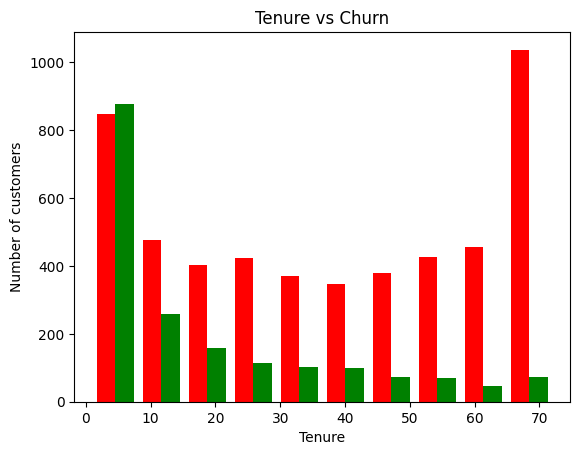

In [10]:
tenure_churn_no = df_cleaned[df_cleaned['Churn'] == 'No'].tenure
tenure_churn_yes = df_cleaned[df_cleaned['Churn'] == 'Yes'].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], label= ['Churn = No', 'Churn = Yes'], color = ['red', 'green'])
plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Number of customers")

You can see that customers with long tenure have not high churn rates as customers with short tenure, particularly the tenure below 10 years. But the increased years come up with the customers who will not leave to extend. This is clearly that from the tenure > 10 years, the number of customers who will not leave to extend always higher.

-> Conclusion: The longer-tenured customers tend to be more loyal and less likely to leave.

- MonthlyCharges vs Churn

Text(0, 0.5, 'Number of customers')

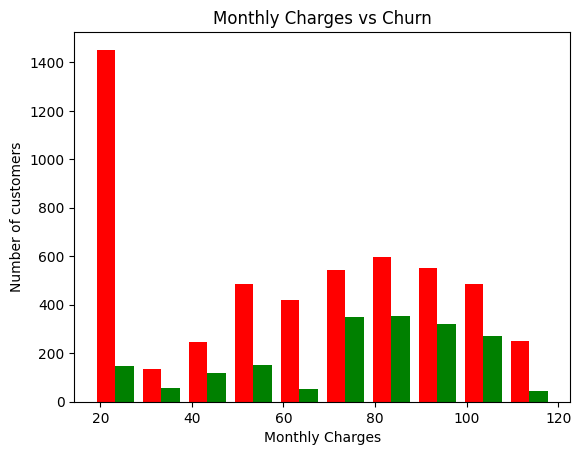

In [11]:
monthlycharges_churn_no = df_cleaned[df_cleaned['Churn'] == 'No'].MonthlyCharges
monthlycharges_churn_yes = df_cleaned[df_cleaned['Churn'] == 'Yes'].MonthlyCharges

plt.hist([monthlycharges_churn_no, monthlycharges_churn_yes], label= ['Churn = No', 'Churn = Yes'], color = ['red', 'green'])
plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")

In every monthly charges of all levels of customers, the number of continue-renew customers is always higher than that of leaving customers. But there are customers with average monthly charges lower 30 that have the highest number of continue-renew customers, particularly higher 1400 customers.

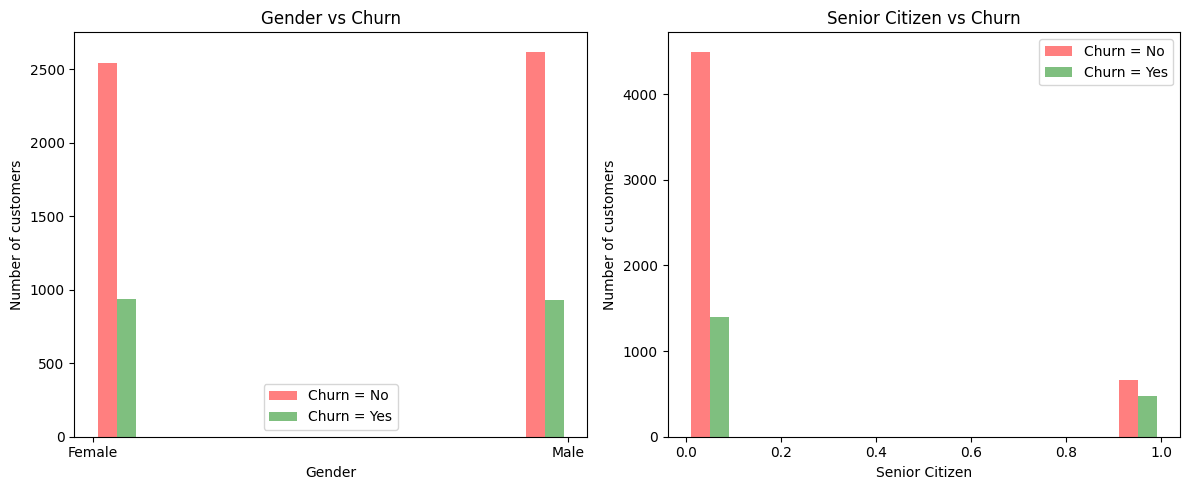

In [12]:
gender_churn_no = df_cleaned[df_cleaned['Churn'] == 'No'].gender
gender_churn_yes = df_cleaned[df_cleaned['Churn'] == 'Yes'].gender

senior_churn_no = df_cleaned[df_cleaned['Churn'] == 'No'].SeniorCitizen
senior_churn_yes = df_cleaned[df_cleaned['Churn'] == 'Yes'].SeniorCitizen

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Gender vs Churn
axes[0].hist([gender_churn_no, gender_churn_yes], label=['Churn = No', 'Churn = Yes'], color=['red', 'green'], alpha=0.5)
axes[0].set_title("Gender vs Churn")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of customers")
axes[0].legend()

# Plot 2: Senior Citizen vs Churn
axes[1].hist([senior_churn_no, senior_churn_yes], label=['Churn = No', 'Churn = Yes'], color=['red', 'green'], alpha=0.5)
axes[1].set_title("Senior Citizen vs Churn")
axes[1].set_xlabel("Senior Citizen")
axes[1].set_ylabel("Number of customers")
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots for better appearance
plt.show()

- The number of customers who continues to renew the service in all gender is always higher than that of customers who leave to renew. And the figure for male customers who continue to use the service is equivalent to that for female customers.
- In the dataset, there are not many number of senior citizen customers, most of customers is teenagers or adolescence; although, in each ages, the customers tend to renew the service.

## Feature Engineering

In [13]:
# Function to print unique values in each columns
def print_unique(cols):
    for cols in df_cleaned:
        print(f"{cols} : {df_cleaned[cols].unique()}")

In [ ]:
print_unique(df_cleaned)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
df_cleaned.replace('No phone service', 'No', inplace= True)
df_cleaned.replace('No internet service', 'No', inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\729242517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace('No phone service', 'No', inplace= True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\729242517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace('No internet service', 'No', inplace= True)


In [16]:
print_unique(df_cleaned)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [17]:
df_cleaned['gender'].replace({"Female": 0, "Male": 1}, inplace = True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\2153209592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['gender'].replace({"Female": 0, "Male": 1}, inplace = True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\2153209592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cl

In [18]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for cols in yes_no_cols:
    df_cleaned[cols].replace({"Yes": 1, "No": 0}, inplace = True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\3741435517.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[cols].replace({"Yes": 1, "No": 0}, inplace = True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_6236\3741435517.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[col

In [19]:
print_unique(df_cleaned)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
df_after_encode = pd.get_dummies(data = df_cleaned, columns= ['InternetService', 'Contract', 'PaymentMethod'], dtype= int)
df_after_encode.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [21]:
df_after_encode.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
def z_score(series):
    mean_val = series.mean()
    std_val = series.std()
    return (series - mean_val) / std_val

normalized_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_after_encode[normalized_cols] = df_after_encode[normalized_cols].apply(z_score)

In [23]:
df_after_encode.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [24]:
df_final = df_after_encode.copy()

## Model Training

In [25]:
X = df_final.drop(['Churn'], axis = 1)
y = df_final['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
len(X_train)

5625

In [28]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,0.430968,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,1,0,0,0,-1.198675,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,0,0,1,0,0.919860,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,1,0,1,1,0.512450,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,0,0,1,1,0.919860,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_dim =26, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5952 - loss: 0.6450
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4266
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7931 - loss: 0.4257
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8023 - loss: 0.4190
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4123
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.4094
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8099 - loss: 0.4011
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8105 - loss: 0.4005
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8154 - loss: 0.3896
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8080 - loss: 0.4081
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8052 - loss: 0.4047
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [30]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.5062


[0.5034735202789307, 0.7690120935440063]

In [31]:
y_pred = model.predict(X_test)
y_pred[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.00760644],
       [0.05884135],
       [0.8730595 ],
       [0.01721369],
       [0.16792613]], dtype=float32)

In [32]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [33]:
y_pred_after_convert = []

for ele in y_pred:
    if ele >= 0.5:
        y_pred_after_convert.append(1)
    else:
        y_pred_after_convert.append(0)

In [34]:
y_pred_after_convert[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [35]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

## Model Evaluation

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred_after_convert, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1098
           1       0.48      0.58      0.52       309

    accuracy                           0.77      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.79      0.77      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

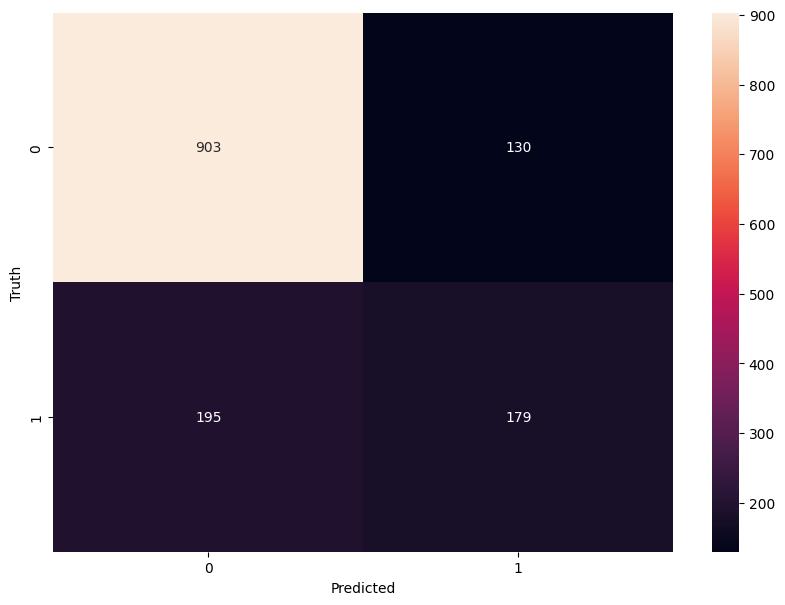

In [37]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_after_convert)

plt.figure(figsize= (10, 7))
sns.heatmap(cm, annot= True, fmt='d') # fmt = 'd' để nó đưa về dạng số đếm không nó sẽ để dạng 1e + ... gì đó
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Hyperameter Tunning for imbalenced data

In [38]:
# Class count
count_class_0, count_class_1 = df_final['Churn'].value_counts()

# Divide by class
df_class_0 = df_final[df_final['Churn'] == 0]
df_class_1 = df_final[df_final['Churn'] == 1]

In [39]:
df_class_0.shape

(5163, 27)

In [40]:
df_class_1.shape

(1869, 27)

### **Method 1: Under-sampling**
- Reduce the data of class having higher data

In [41]:
count_class_0, count_class_1

(5163, 1869)

In [42]:
# Because in this case, class 0 has higher data than class 1 so I will reduce the size of class 0
df_class_0_under = df_class_0.sample(count_class_1)

df_under_sampling = pd.concat([df_class_0_under, df_class_1], axis= 0)

print("Random under sampling method:")
print(df_under_sampling['Churn'].value_counts())

Random under sampling method:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [43]:
df_under_sampling.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5278,0,0,1,1,0.960602,1,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1
4449,0,0,0,0,1.123566,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
6183,1,0,1,1,0.471709,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
324,1,0,0,0,1.490235,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
683,0,1,0,0,0.308744,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
df_under_sampling.shape

(3738, 27)

In [45]:
X_under = df_under_sampling.drop('Churn', axis= 1)
y_under = df_under_sampling['Churn']

from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size= 0.2, random_state = 21, stratify= y_under)

# Tham số stratify=y_under đảm bảo dữ liệu được chia tách sao cho tỷ lệ các lớp trong tập huấn luyện và tập kiểm tra giống với tỷ lệ trong tập dữ liệu gốc (y_under).

In [46]:
y_train_under.value_counts()

Churn
1    1495
0    1495
Name: count, dtype: int64

In [47]:
def ANN(X_train, X_test, y_train, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation= 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation= 'sigmoid'),
    ])
    
    model.compile(optimizer= 'adam', loss = loss, metrics= ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weight = weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification report: \n", classification_report(y_test, y_pred))
    
    cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred)

    plt.figure(figsize= (10, 7))
    sns.heatmap(cm, annot= True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    
    return y_pred

Epoch 1/100


d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6223 - loss: 0.6430
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.4964
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.4610
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.4621
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.4533
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7754 - loss: 0.4611
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.4624
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.4674
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7765 - loss: 0.4581
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7856 - loss: 0.4531
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4532
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - lo

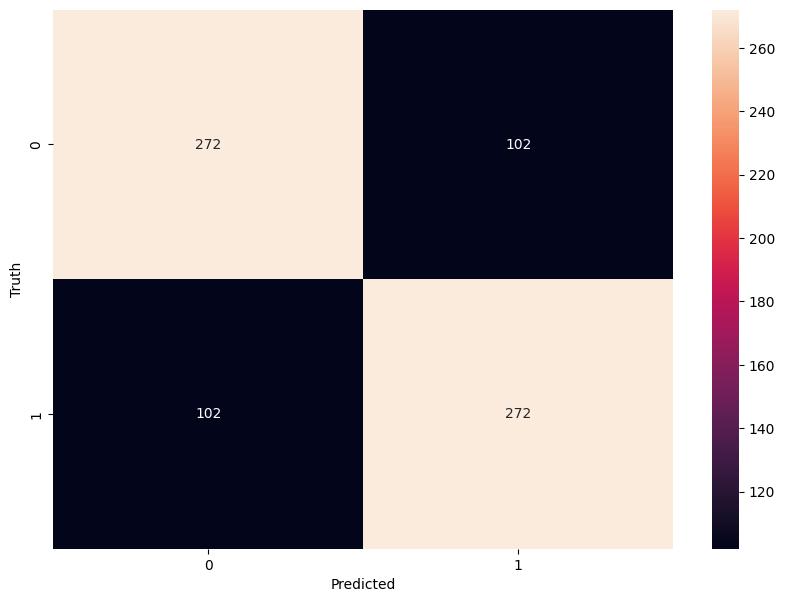

In [48]:
y_pred_under = ANN(X_train_under, X_test_under, y_train_under, y_test_under, 'binary_crossentropy', -1)

**Result:** You can see that when applying under_sampling method, the prediction in class 1 improved clearly with the accuracy is 73%

### **Method 2: Over-Sampling**

In [49]:
count_class_0, count_class_1

(5163, 1869)

In [50]:
df_class_1_over = df_class_1.sample(count_class_0, replace= True)

df_over_sampling = pd.concat([df_class_1_over, df_class_0])
df_over_sampling.shape

(10326, 27)

In [51]:
X_over = df_over_sampling.drop('Churn', axis = 1)
y_over = df_over_sampling['Churn']

from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size= 0.2, random_state= 10, stratify= y_over)

In [52]:
y_train_over.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

Epoch 1/100


d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6917 - loss: 0.5835
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7635 - loss: 0.4915
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7715 - loss: 0.4718
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7667 - loss: 0.4755
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7711 - loss: 0.4783
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7747 - loss: 0.4696
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7836 - loss: 0.4621
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7692 - loss: 0.4655
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7680 - loss: 0.4709
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7828 - loss: 0.4575
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7769 - loss: 0.4564
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

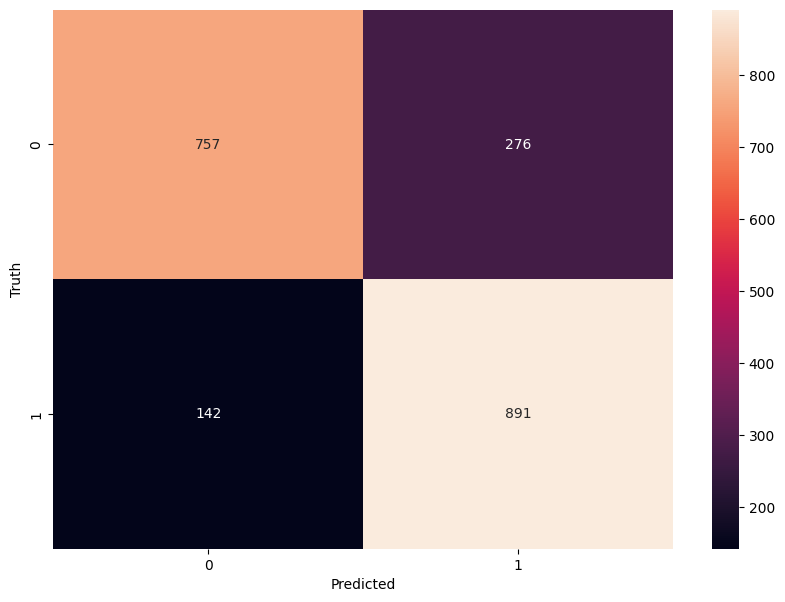

In [53]:
y_pred_over = ANN(X_train_over, X_test_over, y_train_over, y_test_over, 'binary_crossentropy', -1)

**Result:** You can see that when applying the over-sampling method, the prediction of class 1 improved significantly, while the prediction of class 0 did not change much. This is because the new shape of class 1 is from class 0.

### **Method 3: SMOTE**

SMOTE là nó sẽ không copy lại như 2 method trên là over và under-sampling (việc copy lại data trong dữ liệu có mặt negative là nó sẽ gặp tình trạng duplicates rất nhiều với 1 lượng data lớn có thể làm model predict không đúng vì data đã bị skew về phía duplicates). Còn SMOTE nó sẽ dựa trên thuật toán KNN để tìm ra các điểm giống nhau để tạo ra dữ liệu mới. Và điều này sẽ hạn chế được việc duplicates dữ liệu quá nhiều.

1. **Không sao chép dữ liệu:** SMOTE không đơn giản copy dữ liệu như over-sampling thông thường. Thay vào đó, nó tạo dữ liệu mới bằng cách nội suy giữa các điểm dữ liệu thiểu số dựa trên k-nearest neighbors (KNN).

2. **Giảm trùng lặp:** Việc tạo điểm mới dựa trên các điểm lân cận giúp hạn chế tình trạng trùng lặp dữ liệu, giảm nguy cơ làm mô hình học lệch (overfitting).

3. **Dữ liệu cân bằng:** Kết quả là tập dữ liệu có tỷ lệ cân bằng hơn giữa các lớp, cải thiện khả năng học của mô hình khi đối mặt với vấn đề mất cân bằng dữ liệu.

In [54]:
X_smote = df_final.drop('Churn', axis= 1)
y_smote = df_final['Churn']

In [55]:
y_smote.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_smote, y_smote, test_size= 0.2, random_state= 1)

In [59]:
X_train_nn.shape, X_test.shape

((5625, 26), (1407, 26))

In [62]:
# Filter the minority class
X_minority = X_train_nn[y_train_nn == 1]

# Apply KNN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 5).fit(X_minority)
distances, indices = knn.kneighbors(X_minority)

print(f"Average distance between those neighbors: {distances[:, 1:].mean(axis=1).mean():.2f}")

Average distance between those neighbors: 1.16


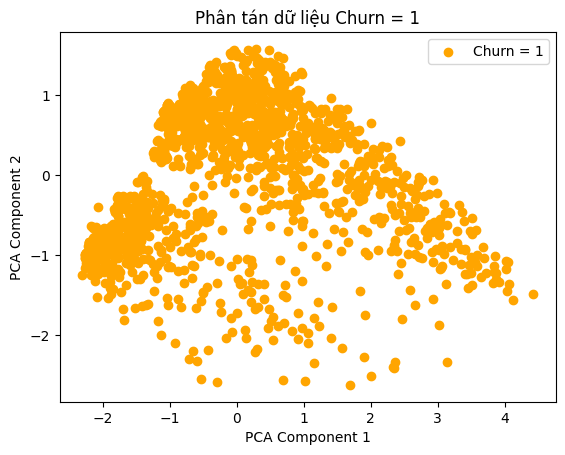

In [66]:
# PCA giảm xuống 2 chiều
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_minority_pca = pca.fit_transform(X_minority)

# Vẽ scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_minority_pca[:, 0], X_minority_pca[:, 1], c='orange', label='Churn = 1')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Phân tán dữ liệu Churn = 1")
plt.legend()
plt.show()

- You can see the average distance between the points is high, particulary higher than 1 so I can resume that the data diversified

In [69]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 32, k_neighbors = 5)
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split 
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size= 0.2, random_state= 15, stratify=y_sm) 

d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7024 - loss: 0.5787
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.4667
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7861 - loss: 0.4560
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4498
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7943 - loss: 0.4349
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4286
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.4371
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4351
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8091 - loss: 0.4170
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8092 - loss: 0.4147
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8196 - loss: 0.4071
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

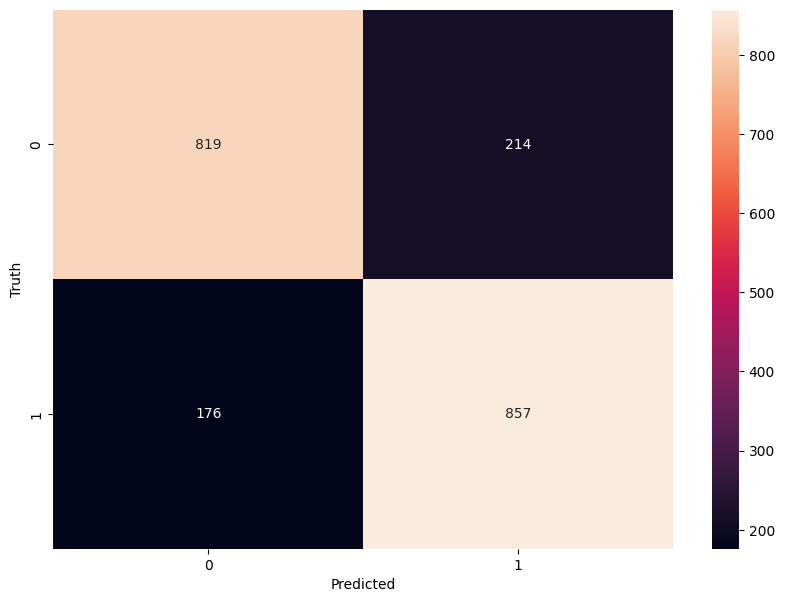

In [75]:
y_pred_sm = ANN(X_train_sm, X_test_sm, y_train_sm, y_test_sm, 'binary_crossentropy', -1)

### **Method 4: Use of Ensemble with undersampling**